In [1]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Loafing the database into dataframe
c = sqlite3.connect('database.sqlite')

# List all tables in the database
df = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'",c)

# Output dataframe
df

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
player_attr_df = pd.read_sql("SELECT gk_handling,gk_kicking,gk_reflexes FROM Player_Attributes",c) 
player_attr_df.fillna(11, inplace=True)

In [6]:
player_attr_df.head(10)

,gk_handling,gk_kicking,gk_reflexes
0,11.0,10.0,8.0
1,11.0,10.0,8.0
2,11.0,10.0,8.0
3,10.0,9.0,7.0
4,10.0,9.0,7.0
5,7.0,9.0,12.0
6,7.0,9.0,12.0
7,7.0,9.0,12.0
8,7.0,9.0,12.0
9,7.0,9.0,12.0


In [8]:
player_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gk_handling  183978 non-null  float64
 1   gk_kicking   183978 non-null  float64
 2   gk_reflexes  183978 non-null  float64
dtypes: float64(3)
memory usage: 4.2 MB


## Kmeans 

In [20]:
km = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter= 300, tol=1e-04, random_state=1)
ykm = km.fit_predict(player_attr_df)

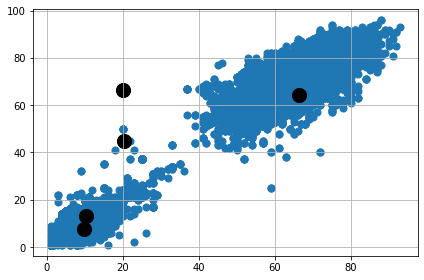

In [21]:
plt.scatter(player_attr_df.gk_handling , player_attr_df.gk_reflexes , marker='o', s = 50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ='black', s = 200)

plt.grid()
plt.tight_layout()
plt.show()

## Elbow Method

In [ ]:
dist= []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter= 300, random_state=0)
    km.fit(player_attr_df)
    dist.append(km.inertia_)

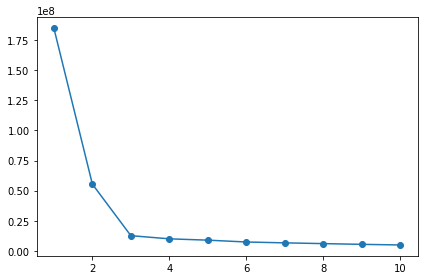

In [17]:
# Pass dist where the parameter underscore is below
plt.scatter(range(1,11), dist, marker = 'o')
plt.plot(range(1,11), dist)
plt.tight_layout()
plt.show()

In [24]:
km = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter= 300, tol=1e-04, random_state=1)
ykm = km.fit_predict(player_attr_df)

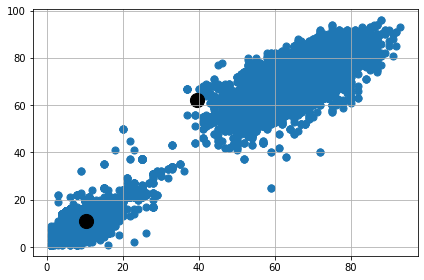

In [25]:
plt.scatter(player_attr_df.gk_handling , player_attr_df.gk_reflexes , marker='o', s = 50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ='black', s = 200)

plt.grid()
plt.tight_layout()
plt.show()

In [3]:
!jupyter-nbconvert --to PDFviaHTML Assignment7_sharanbasav.ipynb

[NbConvertApp] Converting notebook Assignment7_sharanbasav.ipynb to PDFviaHTML
[NbConvertApp] Writing 283538 bytes to Assignment7_sharanbasav.pdf
